### This Notebook is intended to demonstrate the current scripts and function developed recently (Spring-Summer 2020) Don't hesitate to contact me if you have any question. If you detect any bug, you can fill [an issue report](https://github.com/TChauvire/EPR_ESR_Suite/issues).

### Notebook contents : 
    1) Import EPR Bruker Files (BE3ST or ESP types)
    2) Baseline Correction of 1D data files
    3) Datasmooth EPR data
    4) Import multiple 1D datafiles for data treatment automation (3 steps : Import, Baseline correction, Smoothing)
    5) Pseudo-derivation of zero derivatives ESR data (Q-Band Pulse-Field swept echo)
    6) Import of EPR pulsed data with automatic first order phase correction
    7) Frequency domain transformation of ESEEM data
    8) Frequency domain transformation of HYSCORE data
    9) ...

___
### 1) Import EPR Bruker Files (BE3ST or ESP types)
___

In [1]:
### Check for path environment ###
import sys, os, warnings
currentpath = os.getcwd()
folderdata = currentpath + '\\Tests\\epr_Testfiles\\'
folderscript = currentpath + '\\Scripts\\'
sys.path.append(folderdata)
sys.path.append(folderscript)
warnings.filterwarnings('ignore')

In [2]:
### Import of the modules located in Scripts folder ###
import automatic_phase, basecorr1D, datasmooth, eprload_BrukerBES3T, eprload_BrukerESP, fdaxis, fieldmodulation, hilberttrans, ImportMultipleFiles, rcfilt, statistic_tools, windowing

In [3]:
### Import scientific library tools ###
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 80

In [4]:
### Basic data import : .DSC, 1D case
DSC1 = 'DSC_DTA_files\\strong1.DSC'
full_filename1 = folderdata + DSC1
data, abscissa, par = eprload_BrukerBES3T.eprload_BrukerBES3T(full_filename1)

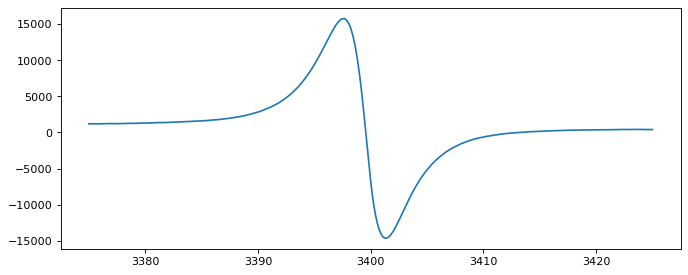

In [5]:
### plot the imported data
plt.plot(abscissa, data);

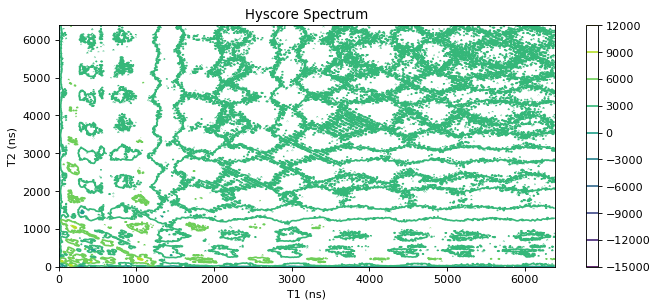

In [6]:
### Basic data import :  .DSC, 2D case (Hiscore data)
DSC2 = 'DSC_DTA_files\\hys_2640G_100ns.DSC'
full_filename2 = folderdata + DSC2
data2, abscissa2, par2 = eprload_BrukerBES3T.eprload_BrukerBES3T(full_filename2)
### plot the imported data
x,y = np.meshgrid(abscissa2[:,0], abscissa2[:,1])
fig, ax = plt.subplots(1, 1);
im = ax.contour(x,y,data2);
ax.set_title('Hyscore Spectrum') ;
ax.set_xlabel("T1 (ns)") ;
ax.set_ylabel("T2 (ns)") ;
cbar = fig.colorbar(im);

In [7]:
par2

{'DSRC': 'EXP',
 'BSEQ': 'BIG',
 'IKKF': 'REAL',
 'XTYP': 'IDX',
 'YTYP': 'IDX',
 'ZTYP': 'NODATA',
 'IRFMT': 'D',
 'XPTS': 400,
 'XMIN': -0.0,
 'XWID': 6384.0,
 'YPTS': 400,
 'YMIN': -0.0,
 'YWID': 6384.0,
 'TITL': ["'hyscore", 'dt=16ns', 'H0=2640G', "tau=100ns'"],
 'IRNAM': "'Intensity'",
 'XNAM': "'Time'",
 'YNAM': "'Time'",
 'IRUNI': "''",
 'XUNI': "'ns'",
 'YUNI': "'ns'",
 'OPER': 'gemi',
 'DATE': '05/11/05',
 'TIME': '20:36:47',
 'CMNT': None,
 'SAMP': None,
 'SFOR': None,
 'STAG': 'C',
 'EXPT': 'PLS',
 'OXS1': 'TADC',
 'AXS1': 'B0VL',
 'AXS2': 'NONE',
 'AXS3': None,
 'MWPW': 0.0006331,
 'A1CT': 0.264,
 'B0VL': 0.264,
 'A1SW': 0.0,
 'MWFQ': 9680501000.0,
 'AVGS': 1,
 '': None,
 '.DVC': <map at 0x11fce3ab7c8>,
 'AcqFineTuning': 'Never',
 'Power': (0.6331, 'mW'),
 'PowerAtten': (25.0, 'dB'),
 'EIEENDORFreq': (14.90218, 'MHz/3.5', 'kG'),
 'EIEIsotope': 'H1',
 'EIERFSweepDir': 'Same',
 'EIEStaticField': (3480.0, 'G'),
 'EIEStaticRF': (1.0, 'MHz'),
 'RF1Atten': (60.0, 'dB'),
 'RF1Freq

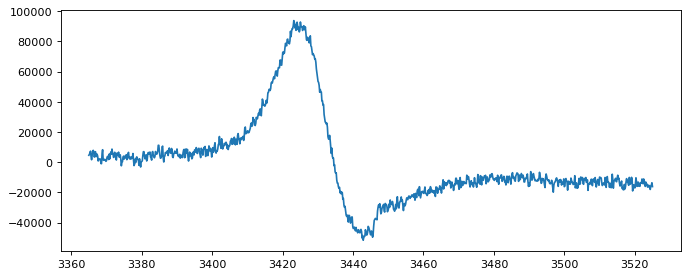

In [8]:
### Basic data import : .spc, 1D case
spc1 = '\\Tests\\home_test\\20190930_TC_20190826_NOSLY173F_1e_t=0s_T60K.par'
full_filename3 = currentpath + spc1
data3, abscissa3, par3 = eprload_BrukerESP.eprload_BrukerESP(full_filename3)
### plot the imported data
plt.plot(abscissa3, data3);

In [9]:
par3

{'HSW': 160.0,
 'DOS': 'Format',
 'ANZ': 1024,
 'MIN': -51706.242188,
 'MAX': 93789.757813,
 'JSS': 0,
 'GST': 3365.0,
 'GSI': 160.0,
 'JUN': 'G',
 'JON': 'Bruker BioSpin GmbH',
 'JCO': '26/08/2019 NosL Y173F 1e- +W  T=60K t=0s 23 dB',
 'JDA': '30/Sep/2019',
 'JTM': '12:59',
 'JRE': 'c:\\program files\\bruker emx\\syscal\\dualmode.cal',
 'JEX': 'field-sweep',
 'JNS': 200,
 'JSD': 107,
 'HCF': 3445.0,
 'RCT': 40.96,
 'RTC': 40.96,
 'RRG': 200000.0,
 'RMA': 3.5,
 'MF': 9.654603,
 'MP': 1.003,
 'MPD': 23.0,
 'JEY': ''}

___
### 2) Baseline Correction of 1D data files
___

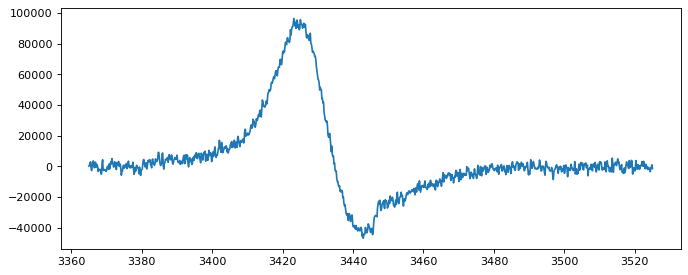

In [10]:
data3_new,c,error_parameters,cov = basecorr1D.basecorr1D(abscissa3, data3, polyorder=1, window = 50)
### plot the corrected data
plt.plot(abscissa3, data3_new);

In [11]:
print(c,error_parameters)

[ 4.07076853e+05 -1.19655790e+02] [1.58964390e+03 4.61393546e-01]


___
### 3) Datasmooth EPR data
___

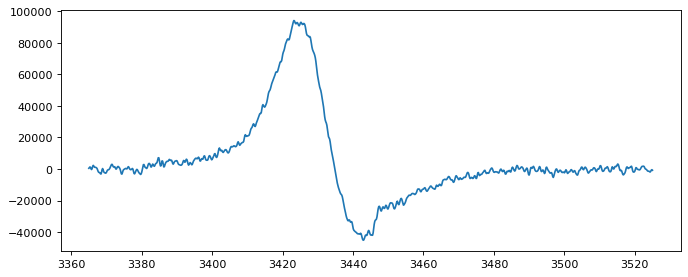

In [12]:
data3_smoothed = datasmooth.datasmooth(y=data3_new,window_length=3,method='binom')
### plot the corrected data
plt.plot(abscissa3, data3_smoothed);

___
### 4) Import multiple 1D datafiles for data treatment automation 
#### (3 steps : Import, Baseline correction, Smoothing)
___

In [13]:
folder = currentpath + '\\Tests\\home_test\\'
ListOfFiles = ImportMultipleFiles.ImportMultipleNameFiles(folder, Extension='.DSC')
maxlen = ImportMultipleFiles.MaxLengthOfFiles(ListOfFiles)
fulldata = ImportMultipleFiles.OpenMultipleFiles(ListOfFiles,Scaling=None,polyorder=1, window=20)

ValueError: The file '20200212_20191210_NOSLN175E_Hyscore_20K.DSC' is't a column vector

In [ ]:
ListOfFiles

In [ ]:
maxlen

In [ ]:
fulldata[1023,:]

In [ ]:
plt.subplot(1,2,1);
plt.plot(fulldata[:,8],fulldata[:,9].real,'k',fulldata[:,8],fulldata[:,10].real,'r');
plt.subplot(1,2,2);
plt.plot(fulldata[:,8],fulldata[:,11].real,'g');

___
### 5) Pseudo-derivation of zero derivatives ESR data (Q-Band Pulse-Field swept echo)
___

In [ ]:
DSC4 = '\\Tests\\home_test\\20200311_NOSLwt_FSE_SRT_200us_100Shot_2.DSC'
full_filename4 = currentpath + DSC4
data4, abscissa4, par4 = eprload_BrukerBES3T.eprload_BrukerBES3T(full_filename4)
plt.plot(abscissa4,data4.real);

In [ ]:
data4_basecorr,_,_,_ =  basecorr1D.basecorr1D(abscissa4, data4.real, polyorder=1, window = 50)
data4_new = fieldmodulation.fieldmodulation(x=abscissa4[:,0],y=data4_basecorr[:,],ModAmpl = 4,Harmonic=1)
plt.plot(abscissa4,data4_new);

___
### 6) Import of EPR pulsed data with automatic first order phase correction
___

In [ ]:
### Data import : .DSC, 1D case, EDNMR data
DSC5 = '\\Tests\\home_test\\20200305_NOSLwT_EDNMR_1.DSC'
full_filename5 = currentpath + DSC5
data5, abscissa5, par5 = eprload_BrukerBES3T.eprload_BrukerBES3T(full_filename5)
### plot the imported data
plt.subplot(1,2,1)
plt.plot(abscissa5, data5.real);
plt.subplot(1,2,2)
plt.plot(abscissa5, data5.imag);

In [ ]:
data5_new, phase_parameters5 = automatic_phase.automatic_phase(data5,pivot1=data5.shape[0]/2,funcmodel='minfunc')

In [ ]:
phase_parameters5

In [ ]:
### plot the phase corrected data
plt.subplot(1,2,1)
plt.plot(abscissa5, data5_new.real);
plt.subplot(1,2,2)
plt.plot(abscissa5, data5_new.imag);

In [ ]:
data5_new2, phase_parameters5b = automatic_phase.automatic_phase(data5,pivot1=1,funcmodel='acme')

In [ ]:
phase_parameters5b

In [ ]:
### plot the phase corrected data
plt.subplot(1,2,1)
plt.plot(abscissa5, data5_new2.real);
plt.subplot(1,2,2)
plt.plot(abscissa5, data5_new2.imag);

___
### 7) Frequency domain transformation of ESEEM data
___

Optimization terminated successfully.
         Current function value: 13080147097.246954
         Iterations: 109
         Function evaluations: 206


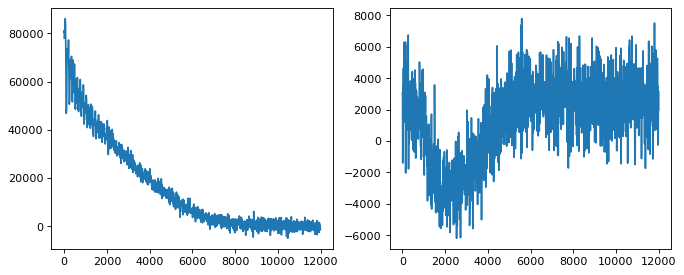

In [14]:
DSC6 = '//DSC_DTA_files//2010_06_25_IKKG_C95_2pESEEM.DSC'
full_filename6 = folderdata + DSC6
data6, abscissa6, par6 = eprload_BrukerBES3T.eprload_BrukerBES3T(full_filename6)
### plot the imported data
data6_new, phase_parameters6 = automatic_phase.automatic_phase(data6,pivot1=data6.shape[0]/2,funcmodel='minfunc')
plt.subplot(1,2,1)
plt.plot(abscissa6, data6_new.real);
plt.subplot(1,2,2)
plt.plot(abscissa6, data6_new.imag);


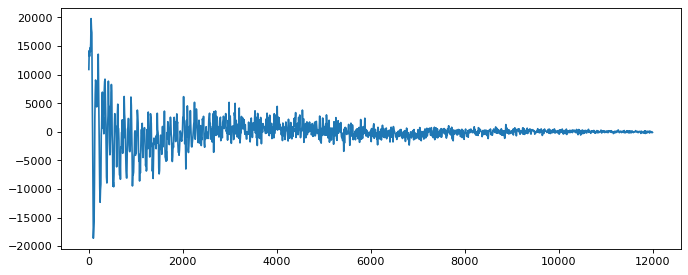

In [15]:
win = windowing.windowing(window_type='ham+',M=abscissa6.shape[0])
data6_basecorr,_,_,_ = basecorr1D.basecorr1D(abscissa6,data6_new.real,polyorder=3,window=750)
data6_win = win*np.ravel(data6_basecorr)
plt.plot(abscissa6,data6_win);

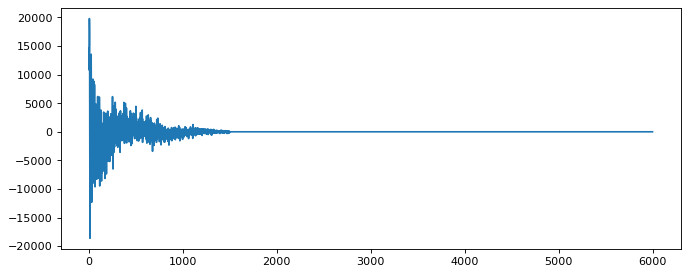

In [16]:
### zero_filling
npts = data6_win.shape[0]
data6_win_zero = np.zeros(npts*4)
data6_win_zero[0:npts] = data6_win[0:npts]
plt.plot(data6_win_zero);

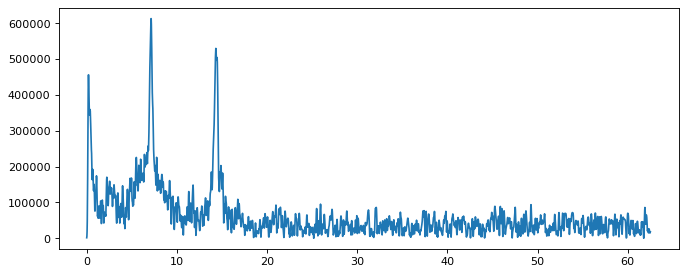

In [17]:
### frequency domain transformation
new_timeaxis6 = np.linspace(abscissa6[0],abscissa6[-1]*4,npts*4)
fdaxis6 = fdaxis.fdaxis(TimeAxis = new_timeaxis6)
data6_fft = np.fft.fftshift(np.fft.fft(data6_win_zero))
fft_npts = int(np.fix(data6_fft.shape[0]/2))
plt.plot(fdaxis6[fft_npts:]*1000,np.abs(data6_fft[fft_npts:]));

___
### 8) Frequency domain transformation of HYSCORE data
___

In [18]:
data2.shape

(400, 400)

In [19]:
abscissa2.shape

(400, 2)

In [20]:
npts2a = data2.shape[0]
npts2b = data2.shape[1]
new_timeaxis2a = np.linspace(abscissa2[0,0],abscissa2[-1,0]*4,npts2a*4)
new_timeaxis2b = np.linspace(abscissa2[0,0],abscissa2[-1,0],npts2b)
fdaxis2a = fdaxis.fdaxis(TimeAxis = new_timeaxis2a)
fdaxis2b = fdaxis.fdaxis(TimeAxis = new_timeaxis2b)

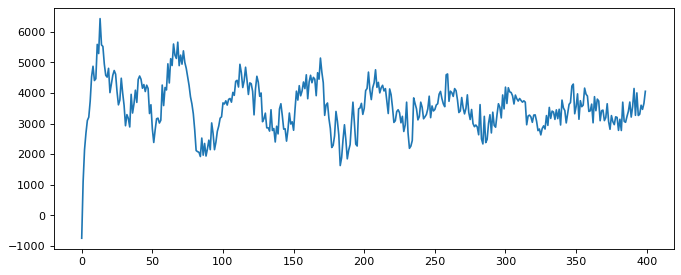

In [21]:
plt.plot(data2[:,200])

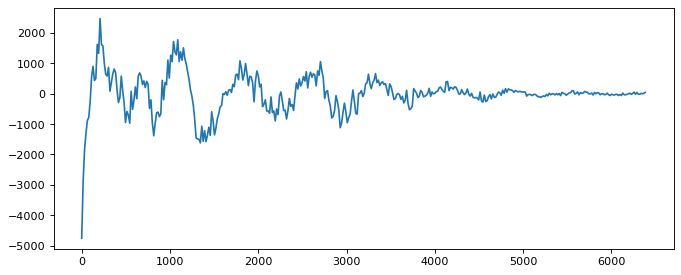

In [22]:
win = windowing.windowing(window_type='ham+',M=abscissa2.shape[0])
data2_basecorr = np.full(data2.shape,np.nan)
data2_win = np.full(data2.shape,np.nan)
for i in range(data2.shape[1]):
    data2_basecorr[:,i],_,_,_ = basecorr1D.basecorr1D(abscissa2[:,0],data2.real[:,i],polyorder=2,window=200)
    data2_win[:,i] = win*np.ravel(data2_basecorr[:,i])
plt.plot(abscissa2[:,0],data2_win[:,200]);

In [23]:
npts2a = data2_win.shape[0]
npts2b = data2_win.shape[1]
data2_win_zero = np.zeros((npts2a*4,npts2b))
data2_win_zero[0:npts2a,0:npts2b] = data2_win[0:npts2a,0:npts2b]

In [24]:
data2_fft = np.fft.fftshift(np.fft.fft2(data2_win_zero))
fft_npts2 = int(np.fix(data2_fft.shape[0]/2))

In [25]:
data2_fft.shape

(1600, 400)

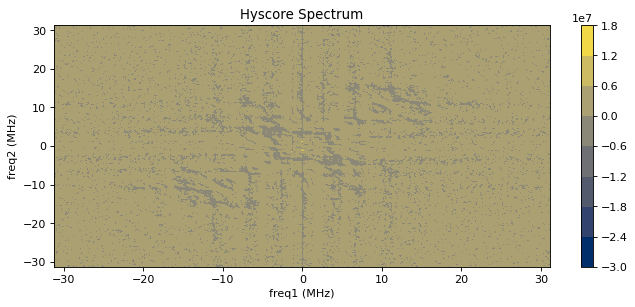

In [27]:
### plot the imported data
x2,y2 = np.meshgrid(fdaxis2b, fdaxis2a)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig2 = plt.figure()
ax2 = plt.axes()
y2fft = np.absolute(data2_fft)
mycol = cm.hsv(y2fft/np.amax(y2fft))

im2 = ax2.contourf(x2*1000,y2*1000,data2_fft.real,cmap = 'cividis',linewidths = 0.001 );

ax2.set_title('Hyscore Spectrum') ;
ax2.set_xlabel("freq1 (MHz)") ;
ax2.set_ylabel("freq2 (MHz)") ;
cbar2 = fig2.colorbar(im2);

In [ ]:
import seaborn as sns

In [ ]:
from mayavi import mlab

In [ ]:
ctr = mlab.test_contour3d()
mlab.figure()
ipw = mlab.pipeline.image_plane_widget(ctr.mlab_source.dataset)
mlab.show()

In [ ]:
new_fig = mlab.figure()
ipw = mlab.pipeline.image_plane_widget(ctr.mlab_source.dataset, figure=new_fig)

### Lexical List of the functions in the Scripts folder :
##### In alphabetic order :
    
<p><strong>1) automatic_phase</strong></p>
    <p>'automatic_phase' --> main function to do phase correction using two algorithms (see Binczyk et al. BioMedical Engineering OnLine 2015, 14(Suppl 2):S5 doi: 10.1186/1475-925X-14-S2-S5) : </p>
        <ol><p>'acme' (see Chen Li et al. Journal of Magnetic Resonance 158 (2002) 164-168)</p>
            <p>'minfunc' (minimization of the imaginary part)</p>
        </ol>
<p><strong>2) basecorr1D</strong></p>
    <ol><p>'basecorr1D'</p>
        <p>'error_vandermonde'</p>
    </ol>
<p><strong>3) datasmooth</strong></p>
    <ol><p>'datasmooth'</ol> 
<p><strong>4) eprload_BrukerBES3T</strong></p>
    <ol><p>'eprload_BrukerBES3T'</p>
        <p>'xepr_load_acqu'</p>
    </ol> 
<p><strong>5) eprload_BrukerESP</strong></p>
    <ol><p>'eprload_BrukerESP'</p>
        <p>'load_winepr_param'</p>
    </ol>  
<p><strong>6) fdaxis</strong></p>
    <ol><p>'fdaxis'</ol>    
<p><strong>7) fieldmodulation</strong></p>
    <ol><p>'fieldmodulation'</ol>
<p><strong>8) hilberttrans</strong></p>
    <ol><p>'hilberttrans'</ol>  
<p><strong>9) ImportMultipleFiles</strong></p>
    <ol><p>'ImportMultipleNameFiles'</p>
        <p>'MaxLengthOfFiles'</p>
        <p>'OpenMultipleFiles'</p>
        <p>'eprload'</p>
     </ol>    
<p><strong>10) rcfilt</strong></p>
    <ol><p>'rcfilt'</ol>  
<p><strong>11) statistic_tools</strong></p>
    <ol><p>'ComputeJacobian'</p>
        <p>'ComputeSER'</p>
        <p>'corr_to_covariancematrix'</p>
        <p>'cov_to_correlationmatrix'</p>
        <p>'csc_matrix'</p>
        <p>'error_jacobian'</p>
        <p>'error_vandermonde</p>
        <p>'residual</p>
        <p>'stddev_covnmatrix</p>
    </ol>    
<p><strong>12) windowing</strong></p>
    <ol><p>'windowing'</p></ol>